Simple steps for tesseract installation in windows.

Download tesseract exe from https://github.com/UB-Mannheim/tesseract/wiki.

https://tesseract-ocr.github.io/tessdoc/

Install this exe in C:\Program Files (x86)\Tesseract-OCR

Open virtual machine command prompt in windows or anaconda prompt.

Run pip install pytesseract

To test if tesseract is installed type in python prompt:

import pytesseract

print(pytesseract)

Github Link: https://github.com/hennypurwadi/Image_to_Text_Converter

Streamlit Link: https://hennypurwadi-collection-apps-img2text-m5cjli.streamlit.app/

In [ ]:
#pip install opencv-python

In [ ]:
#pip install imutils

In [ ]:
#pip install onnxruntime

In [ ]:
#pip install pytesseract

In [8]:
import cv2
import PIL
import numpy as np
import pytesseract
import os
#print(os.getcwd())

In [9]:
img = cv2.imread("./ss/image.jpg")
print(img.shape)

(512, 512, 3)


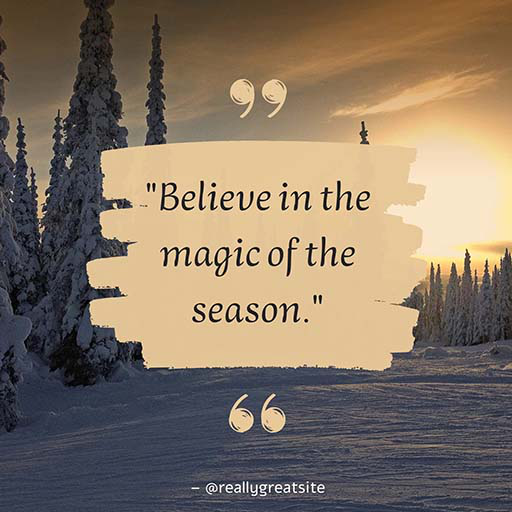

In [6]:
img = PIL.Image.open('./ss/image.jpg')
img

In [10]:
cv2.imshow("img", img)
cv2.waitKey(0)

-1

In [11]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [12]:
pytesseract.get_languages()

['eng', 'osd']

In [13]:
text = pytesseract.image_to_string(img, lang = 'eng')

In [14]:
print(text)

"Believe in the

magic of the

season."




In [15]:
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(img_gray,70,255,cv2.THRESH_BINARY)
# text = pytesseract.image_to_string(thresh, config = r"--psm 5", lang = 'eng')
# print(text)

# Streamlit deploy

In [30]:
%%writefile img2text.py

import streamlit as st
import cv2
import pytesseract
from PIL import Image
import numpy as np

# Config
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def convert_image_to_text(image):
    img = np.array(image.convert('RGB'))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    text = pytesseract.image_to_string(img, lang='eng')
    return text

# layout
st.title("Image to Text Converter")
st.write("Upload an image (.jpg or .png) to extract the text.")

uploaded_image = st.file_uploader("Choose an image file", type=['jpg', 'jpeg', 'png'])

if uploaded_image is not None:
    image = Image.open(uploaded_image)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")

    if st.button("Convert to Text"):
        st.write("Converting...")
        extracted_text = convert_image_to_text(image)
        st.write("Extracted Text:")
        st.write(extracted_text)


Writing img2text.py
